In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from scipy.cluster import hierarchy as sch
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/7_Clustering/EastWestAirlines.csv")

In [3]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.shape

(3999, 12)

In [5]:
data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


<AxesSubplot:xlabel='Award', ylabel='count'>

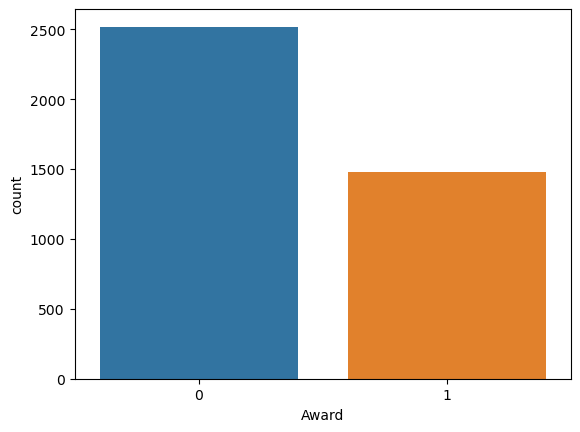

In [7]:
sns.countplot('Award',data=data)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

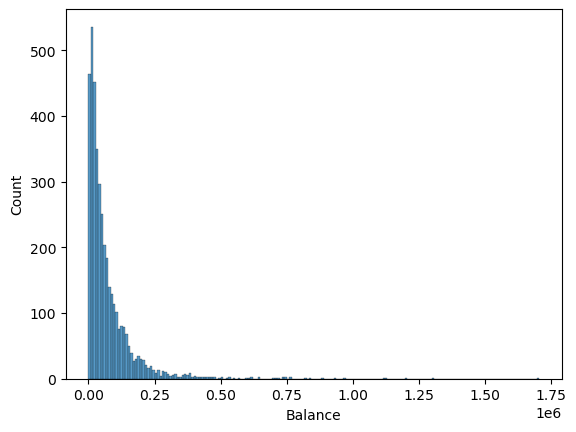

In [8]:
sns.histplot(data['Balance'])

In [9]:
dataset=data.iloc[:,1:]
dataset.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
# Normalization function 
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
dataset_norm = minmax_func(dataset.iloc[:,0:])
dataset_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


## Agglomerative Clustering


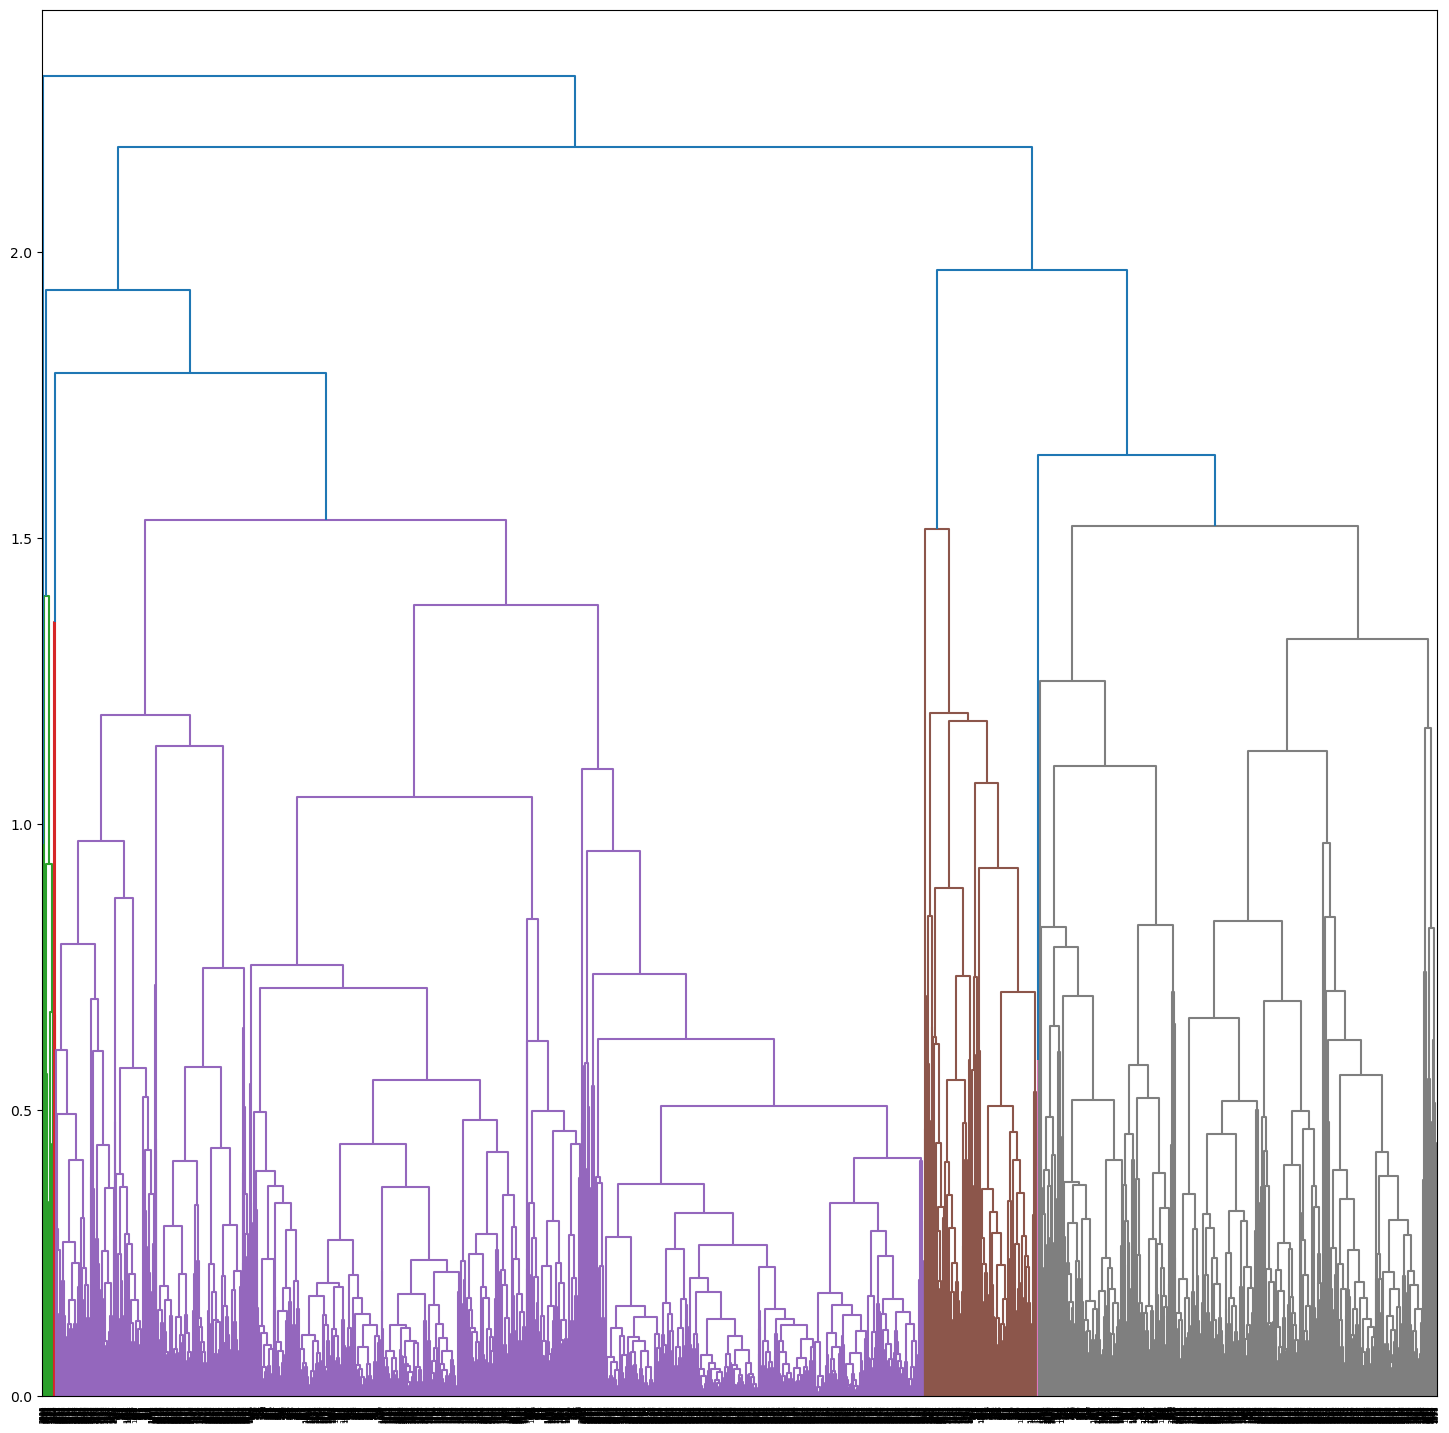

In [12]:
# create dendrogram
plt.figure(figsize=(18,18))
dendrogram = sch.dendrogram(sch.linkage(dataset_norm, method='complete'))

In [ ]:
plt.figure(figsize=(16,10))
dngrm=sch.dendrogram(sch.linkage(dataset_norm, method='ward', metric='euclidean'))

In [ ]:
agg=AgglomerativeClustering(n_clusters=2,linkage='single')
agg_data=agg.fit_predict(dataset_norm)
agg_data

In [ ]:
agg_df=pd.DataFrame(agg_data)
agg_df

In [ ]:
dataset['Clusters']=agg_df
dataset

In [ ]:
agg_df.value_counts()

In [ ]:
agg_0=dataset[dataset.Clusters==0]
agg_0

In [ ]:
dataset.groupby('Clusters').mean()

In [ ]:
agg_1=dataset[dataset.Clusters==1]
agg_1

In [ ]:
plt.scatter('Balance','Bonus_miles',data=agg_0)
plt.scatter('Balance','Bonus_miles',data=agg_1)

In [ ]:
sse = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dataset_norm)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

In [ ]:
sse

In [ ]:
#here the optimal kvalue is considered to be 4
KM_C=KMeans(n_clusters=4)
KM_DATA=KM_C.fit_predict(dataset_norm)
KM_DATA

In [ ]:
dataset_km=pd.DataFrame(KM_DATA)
dataset_km.head()

In [ ]:
km_data=dataset.copy()
km_data

In [ ]:
km_data['Clusters']=dataset_km
km_data

In [ ]:
km_data['Clusters'].value_counts()

In [ ]:
km_data_0=km_data[km_data.Clusters==0]
km_data_0

In [ ]:
km_data_1=km_data[km_data.Clusters==1]
km_data_1

In [ ]:
km_data_2=km_data[km_data.Clusters==2]
km_data_2

In [ ]:
km_data_3=km_data[km_data.Clusters==3]
km_data_3

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(km_data_0["Balance"],km_data_0["Bonus_miles"])
plt.scatter(km_data_1["Balance"],km_data_1["Bonus_miles"],color="green")
plt.scatter(km_data_2["Balance"],km_data_2["Bonus_miles"],color="red")
plt.scatter(km_data_3["Balance"],km_data_3["Bonus_miles"],color="yellow")
plt.show()

In [ ]:
#DBSCAN
DB_C=DBSCAN(eps=.5,min_samples=8)
DB_P=DB_C.fit_predict(dataset_norm)
DB_P


In [ ]:
DB_DF=pd.DataFrame(DB_P)
DB_DF

In [ ]:
DB_DATA=data.copy()

In [ ]:
DB_DATA['Clusters']=DB_DF
DB_DATA.head()

In [ ]:
DB_DATA.Clusters.value_counts()#4 clusters

In [ ]:
DB_N1=DB_DATA[DB_DATA.Clusters==-1]
DB_0=DB_DATA[DB_DATA.Clusters==0]
DB_1=DB_DATA[DB_DATA.Clusters==1]
DB_2=DB_DATA[DB_DATA.Clusters==2]
DB_3=DB_DATA[DB_DATA.Clusters==3]
DB_4=DB_DATA[DB_DATA.Clusters==4]

In [ ]:
DB_N1.head()

In [ ]:
DB_0.head()

In [ ]:
DB_1.head()

In [ ]:
DB_2.head()

In [ ]:
DB_3.head()

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter("Balance","Bonus_miles",data=DB_N1)
plt.scatter("Balance","Bonus_miles",data=DB_0)
plt.scatter("Balance","Bonus_miles",data=DB_1)
plt.scatter("Balance","Bonus_miles",data=DB_2)
plt.scatter("Balance","Bonus_miles",data=DB_3)
plt.scatter("Balance","Bonus_miles",data=DB_4)

## 4 is the optimal number of clusters